In [5]:
# Intall cognite-sdk if not already done & upgrade numpy to latest version (alternativ is to do from the anaconda prompt)
#!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org cognite-sdk
#!pip install python-pptx

In [2]:
# Import libraries
import datetime
from datetime import date, timedelta
import cognite
import numpy as np
import pandas as pd
import os
from datetime import timedelta as td
import dateutil.parser
import xlsxwriter
from openpyxl import load_workbook
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pptx import Presentation
from pptx.util import Cm

In [3]:
import cognite
# Instantiate a new cognite client and check status
from cognite.client import CogniteClient
#client = CogniteClient(api_key=getpass("Open Industrial Data API-KEY: "), project="lundin", client_name="timeseries_test")
client = CogniteClient(api_key="NDZhZTMwNmYtN2QyMi00NWZlLWE5MWMtZmNkMWI1ZmJjYmY1", project="lundin", client_name="vol")
client.login.status()

{
    "user": "HenrikKarlBertil.Lundin@lundin-energy.com",
    "project": "lundin",
    "project_id": 5831549927548771,
    "logged_in": true,
    "api_key_id": 808834597949006
}

C:\Apps\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Apps\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


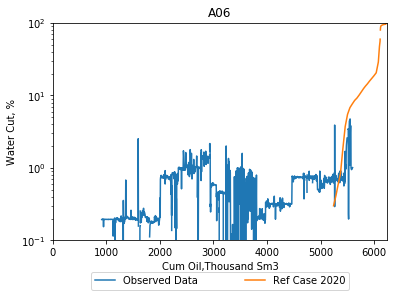

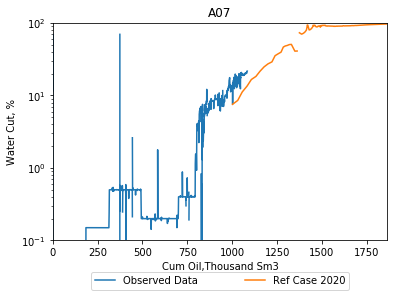

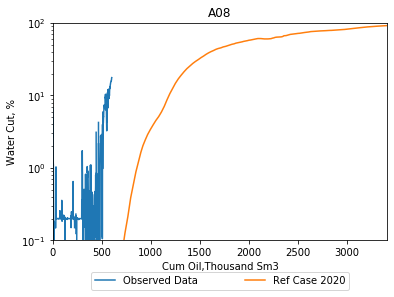

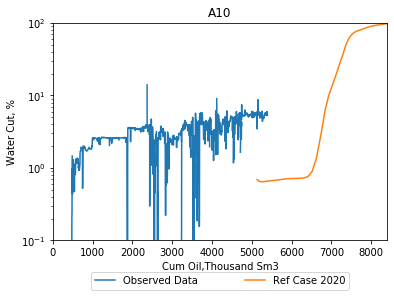

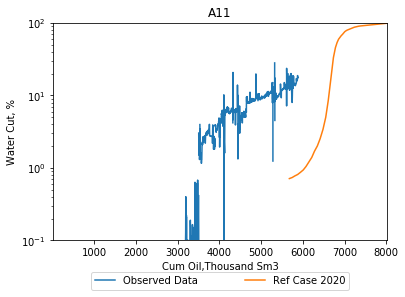

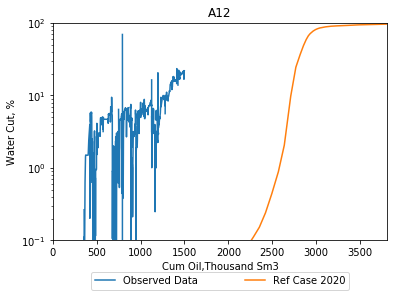

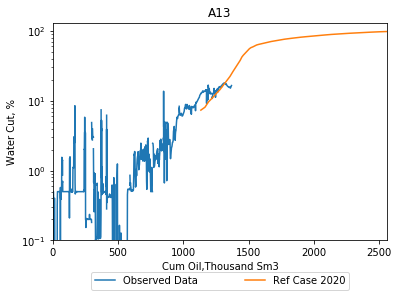

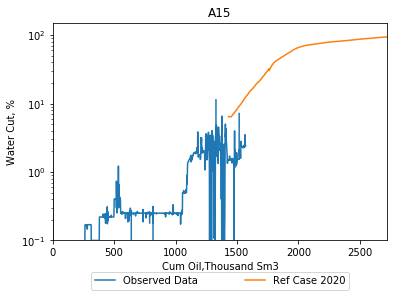

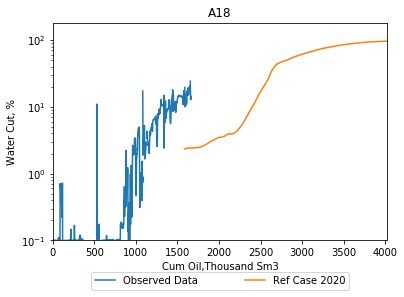

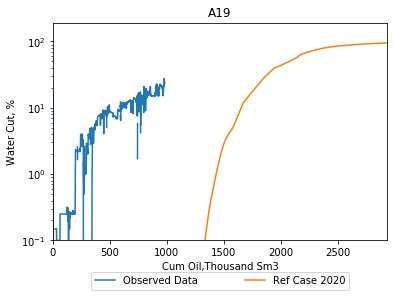

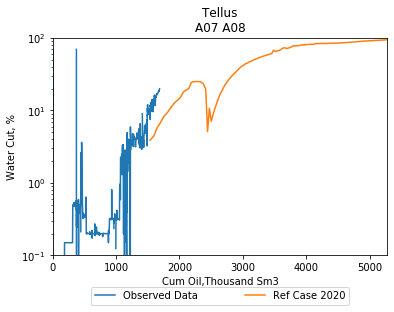

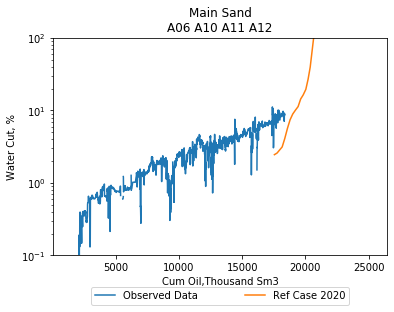

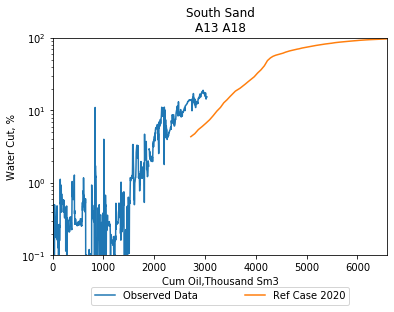

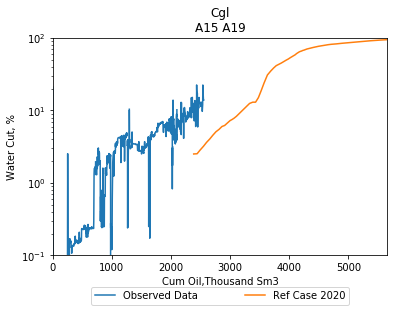

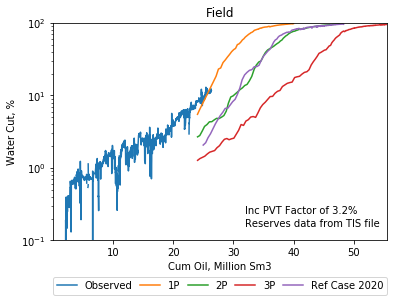

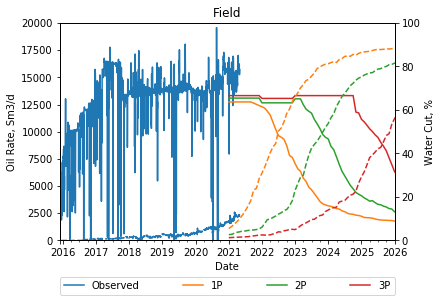

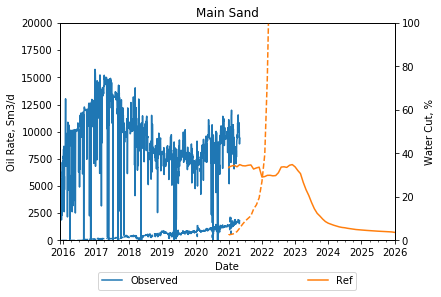

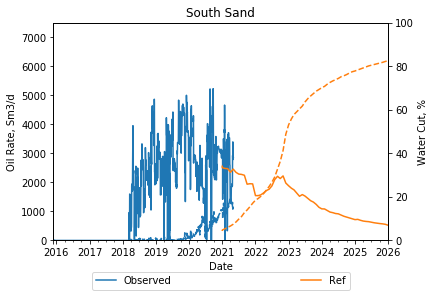

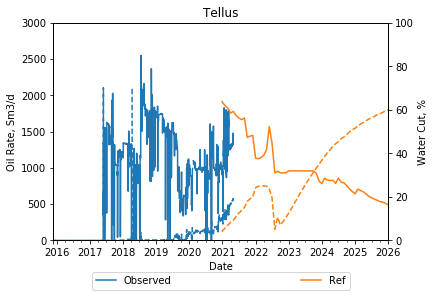

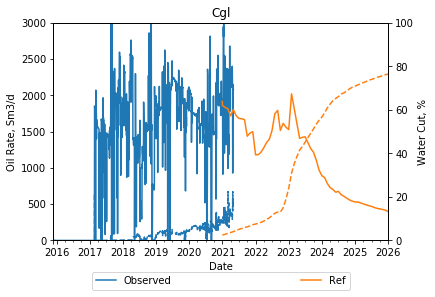

In [39]:
#############################################################################
### Input 
#############################################################################

###Observed data until date 
end_date_x = datetime.datetime(2021,5,3) # End date for fetching rate data


### included in Ref_case_clean [F OPT] and in Field_Hist['cum_oil']
### used for comparing reserves valuse on a field level
PVT_factor = 1.032

### Start date of the ref case curve. this is can be set to only include the predition part of the simualtion  
Start_of_Ref_Case = datetime.datetime(2020,12,31)

### Name of recase shown in the figures 
Ref_case_name = 'Ref Case 2020'

######################################################################################
#### extract data points from Cognite
######################################################################################

start_date_x = datetime.datetime(2015,11,28) # Start date for fetching rate data


A01_start = datetime.datetime(2016,9,29) # Start date for well A01

A02_start = datetime.datetime(2016,7,7) # Start date for well A02

A05_start = datetime.datetime(2018,1,18) # Start date for well A05




y=0
while y<=15:
    if (y==1):
        oilRateTags = 'EG_A06.FAS.OilVolStdStg1' 
        waterRateTags= 'EG_A06.FAS.WaterVolStdStg1'
        gasRateTags = 'EG_A06.FAS.GasVolStdStg1'
        gaslift = 'EG_13FI1325.Y'
        bhp = 'EG_13PT5122.Y'
        whp = 'EG_13PT5110.Y'
        A06_df=client.datapoints.retrieve(external_id=[oilRateTags, waterRateTags, gasRateTags, gaslift, bhp, whp], 
                                          aggregates=['average'], granularity='1d', start=start_date_x, 
                                          end=end_date_x).to_pandas()
   
    if (y==2):
        oilRateTags = 'EG_A07.FAS.OilVolStdStg1' 
        waterRateTags= 'EG_A07.FAS.WaterVolStdStg1'
        gasRateTags = 'EG_A07.FAS.GasVolStdStg1'
        gaslift = 'EG_13FI1425.Y'
        bhp_heel = 'EG_13PT5194.Y'
        bhp_toe = 'EG_13PT5192.Y'
        whp = 'EG_13PT5160.Y'
        icdheel = 'EG_13ZY6517.Y(2)' 
        icdtoe = 'EG_13ZY6519.Y(2)'
        A07_df=client.datapoints.retrieve(external_id=[oilRateTags, waterRateTags, gasRateTags, gaslift, bhp_heel, bhp_toe, whp,
                                                      icdheel, icdtoe], aggregates=['average'], granularity='1d', 
                                          start=start_date_x, end=end_date_x).to_pandas()
    
    if (y==3):
        oilRateTags = 'EG_A08.FAS.OilVolStdStg1' 
        waterRateTags= 'EG_A08.FAS.WaterVolStdStg1'
        gasRateTags = 'EG_A08.FAS.GasVolStdStg1'
        gaslift = 'EG_13FI1525.Y'
        bhp = 'EG_13PT5222.Y'
        whp = 'EG_13PT5210.Y'
        A08_df=client.datapoints.retrieve(external_id=[oilRateTags, waterRateTags, gasRateTags, gaslift, bhp,whp], 
                                                    aggregates=['average'], granularity='1d', start=start_date_x, 
                                                    end=end_date_x).to_pandas()
        
    if (y==4):
        oilRateTags = 'EG_A10.FAS.OilVolStdStg1' 
        waterRateTags= 'EG_A10.FAS.WaterVolStdStg1'
        gasRateTags = 'EG_A10.FAS.GasVolStdStg1'
        gaslift = 'EG_13FI1625.Y'
        bhp = 'EG_13PT5272.Y'
        whp = 'EG_13PT5260.Y'
        A10_df=client.datapoints.retrieve(external_id=[oilRateTags, waterRateTags,gasRateTags, gaslift, bhp,whp], 
                                                    aggregates=['average'], granularity='1d', start=start_date_x, 
                                                    end=end_date_x).to_pandas()
    if (y==5):
        oilRateTags = 'EG_A11.FAS.OilVolStdStg1' 
        waterRateTags= 'EG_A11.FAS.WaterVolStdStg1'
        gasRateTags = 'EG_A11.FAS.GasVolStdStg1'
        gaslift = 'EG_13FI1725.Y'
        bhp = 'EG_13PT5322.Y'
        whp = 'EG_13PT5310.Y'
        A11_df=client.datapoints.retrieve(external_id=[oilRateTags, waterRateTags,gasRateTags, gaslift, bhp, whp], 
                                                    aggregates=['average'], granularity='1d', start=start_date_x, 
                                                    end=end_date_x).to_pandas()
    if (y==6):
        oilRateTags = 'EG_A12.FAS.OilVolStdStg1' 
        waterRateTags= 'EG_A12.FAS.WaterVolStdStg1'
        gasRateTags = 'EG_A12.FAS.GasVolStdStg1'
        gaslift = 'EG_13FI1825.Y'
        bhp_heel = 'EG_13PT5374.Y'
        bhp_toe = 'EG_13PT5372.Y'
        whp = 'EG_13PT5360.Y'
        icdheel = 'EG_13ZY6505.Y(2)' 
        icdtoe = 'EG_13ZY6507.Y(2)'
        A12_df=client.datapoints.retrieve(external_id=[oilRateTags, waterRateTags, gasRateTags, gaslift, bhp_heel, bhp_toe, whp,
                                                      icdheel, icdtoe], aggregates=['average'], granularity='1d', 
                                          start=start_date_x, end=end_date_x).to_pandas()
    
    if (y==7):
        oilRateTags = 'EG_A13.FAS.OilVolStdStg1' 
        waterRateTags= 'EG_A13.FAS.WaterVolStdStg1'
        gasRateTags = 'EG_A13.FAS.GasVolStdStg1'
        gaslift = 'EG_13FI1925.Y'
        bhp_heel = 'EG_13PT5442.Y'
        bhp_toe = 'EG_13PT5444.Y'
        whp = 'EG_13PT5410.Y'
        icdheel = 'EG_13ZY6535.Y(2)' 
        icdtoe = 'EG_13ZY6537.Y(2)'
        A13_df=client.datapoints.retrieve(external_id=[oilRateTags, waterRateTags, gasRateTags, gaslift, bhp_heel, bhp_toe, whp,
                                                      icdheel, icdtoe], aggregates=['average'], granularity='1d', 
                                          start=start_date_x, end=end_date_x).to_pandas()       
    if (y==8):
        oilRateTags = 'EG_A15.FAS.OilVolStdStg1' 
        waterRateTags= 'EG_A15.FAS.WaterVolStdStg1'
        gasRateTags = 'EG_A15.FAS.GasVolStdStg1'
        gaslift = 'EG_13FI2025.Y'
        bhp = 'EG_13PT5472.Y'
        whp = 'EG_13PT5460.Y'
        A15_df=client.datapoints.retrieve(external_id=[oilRateTags, waterRateTags,gasRateTags, gaslift, bhp, whp], 
                                                    aggregates=['average'], granularity='1d', start=start_date_x, 
                                                    end=end_date_x).to_pandas()
    if (y==9):
        oilRateTags = 'EG_A18.FAS.OilVolStdStg1' 
        waterRateTags= 'EG_A18.FAS.WaterVolStdStg1'
        gasRateTags = 'EG_A18.FAS.GasVolStdStg1'
        gaslift = 'EG_13FI2325.Y'
        bhp = 'EG_13PT5622.Y'
        whp = 'EG_13PT5610.Y'
        A18_df=client.datapoints.retrieve(external_id=[oilRateTags, waterRateTags,gasRateTags, gaslift, bhp,whp], 
                                                    aggregates=['average'], granularity='1d', start=start_date_x, 
                                                    end=end_date_x).to_pandas()
    if (y==10):
        oilRateTags = 'EG_A19.FAS.OilVolStdStg1' 
        waterRateTags= 'EG_A19.FAS.WaterVolStdStg1'
        gasRateTags = 'EG_A19.FAS.GasVolStdStg1'
        gaslift = 'EG_13FI2425.Y'
        bhp = 'EG_13PT5672.Y'
        whp = 'EG_13PT5660.Y'
        A19_df=client.datapoints.retrieve(external_id=[oilRateTags, waterRateTags,gasRateTags, gaslift, bhp,whp], 
                                                    aggregates=['average'], granularity='1d', start=start_date_x, 
                                                    end=end_date_x).to_pandas()
   
    if (y==11):  # A01 water injector 
        WaterInj = 'EG_13FT1033.Y'
        bhp = 'EG_13PT5722.Y'
        whp = 'EG_13PT5710.Y'
        A01_df=client.datapoints.retrieve(external_id=[WaterInj, bhp, whp], aggregates=['average'], granularity='1d', 
                                          start=A01_start, end=end_date_x).to_pandas() 
    if (y==12):  # A02 water injector 
        WaterInj = 'EG_13FT1035.Y'
        bhp = 'EG_13PT5772.Y'
        whp = 'EG_13PT5760.Y'
        A02_df=client.datapoints.retrieve(external_id=[WaterInj, bhp, whp], aggregates=['average'], granularity='1d', 
                                          start=A02_start, end=end_date_x).to_pandas() 
    if (y==13):  # A05 water injector 
        WaterInj = 'EG_13FT1037.Y'
        bhp = 'EG_13PT5822.Y'
        whp = 'EG_13PT5810.Y'
        A05_df=client.datapoints.retrieve(external_id=[WaterInj, bhp, whp], aggregates=['average'], granularity='1d', 
                                          start=A05_start, end=end_date_x).to_pandas() 
          
    if (y==14):  # A20 producer / water injector
        oilRateTags = 'EG_A20.FAS.OilVolStdStg1' 
        waterRateTags= 'EG_A20.FAS.WaterVolStdStg1'
        gasRateTags = 'EG_A20.FAS.GasVolStdStg1'
        WaterInj = 'EG_13FT1834.Y'
        bhp_heel = 'EG_13PT5044.Y'
        bhp_toe = 'EG_13PT5024.Y'
        whp = 'EG_13PT5010.Y'
        icdheel = 'EG_13ZY6523.Y(2)' 
        icdtoe = 'EG_13ZY6525.Y(2)'
        A20_df=client.datapoints.retrieve(external_id=[oilRateTags, waterRateTags, gasRateTags, WaterInj, bhp_heel, bhp_toe, 
                                                       whp, icdheel, icdtoe], aggregates=['average'], granularity='1d', 
                                                          start=start_date_x, end=end_date_x).to_pandas()   
        
        
    if (y==15):  # Field EC tags Allocated to EG
        oilRateTags = 'EG_OilExportEG.EC.d.allocvolume' 
        waterRateTags= 'EG_WaterproductionEG.EC.d.allocvolume'
#        EC_Field=client.datapoints.retrieve(external_id=['EG_OilExportEG.EC.d.allocvolume', waterRateTags],start=start_date_x, end=end_date_x).to_pandas()       
 
    y += 1

######################################################################################    
### before 07-03-2018 gas was only injected into A02
### after 30-09-2018 there is one gas injection rate tag for A02 and A05 
### there are also two tags indicating gas or water injection 1 = gas 0 = water
######################################################################################

gasinj_b = 'EG_26FY1023.Y' # kSm³/h, beofre 07-03-2018
gasinj_a = 'EG_26FI1023D.Y' # MSm³/d, after 30-09-2018
A02_ind = 'EG_13HSS2621.Y' # tag indicator 1 = gas 0 = water
A05_ind = 'EG_13HSS2721.Y' # tag indicator 1 = gas 0 = water
GasInj_df=client.datapoints.retrieve(external_id=[gasinj_b, gasinj_a, A02_ind, A05_ind], aggregates=['average'], granularity='1d', 
                                          start=start_date_x, end=end_date_x).to_pandas()    

######################################################################################
#### Make all NaN to 0 value  
######################################################################################
Hist_df = [A06_df, A07_df, A08_df, A10_df, A11_df, A12_df, A13_df, A15_df, A18_df, A19_df]

for i in Hist_df:
    i=i.fillna(0)

A01_df=A01_df.fillna(0)
A02_df=A02_df.fillna(0)
A05_df=A05_df.fillna(0)
A20_df=A20_df.fillna(0)

######################################################################################
#### Set all negative values to 0 
######################################################################################

for i in Hist_df:
    i[i < 0] = 0

A01_df[A01_df < 0] = 0
A02_df[A02_df < 0] = 0
A05_df[A05_df < 0] = 0
A20_df[A20_df < 0] = 0

GasInj_df[GasInj_df < 0] = 0

######################################################################################
#### Name the columns in the dataframe
######################################################################################

col = ['oil', 'water', 'gas', 'gaslift','bhp', 'whp']

col_swell = ['oil', 'water', 'gas','gaslift','bhp_heel', 'bhp_toe', 'whp','ICD_heel', 'ICD_toe']

col_20 = ['oil', 'water', 'gas', 'water_inj','bhp_heel', 'bhp_toe', 'whp','ICD_heel', 'ICD_toe']

col_01 = [ 'water_inj','bhp', 'whp']

col_0205 = [ 'water_inj','bhp', 'whp']

col_gas = ['inj_b', 'inj_a', 'A02_ind', 'A05_ind']

A06_df.columns = col
A07_df.columns = col_swell
A08_df.columns = col
A10_df.columns = col
A11_df.columns = col
A12_df.columns = col_swell
A13_df.columns = col_swell
A15_df.columns = col
A18_df.columns = col
A19_df.columns = col

A01_df.columns = col_01
A02_df.columns = col_0205
A05_df.columns = col_0205
A20_df.columns = col_20

GasInj_df.columns = col_gas

######################################################################################
#### change oil, water and gas rate to daily production from hourly
######################################################################################

for i in Hist_df:

    i['oil']=i['oil']*24
    i['water']=i['water']*24
    i['gas']=i['gas']*24


A20_df['oil']=A20_df['oil']*24
A20_df['water']=A20_df['water']*24
A20_df['gas']=A20_df['gas']*24
A20_df['water_inj']=A20_df['water_inj']*24


A01_df['water_inj']=A01_df['water_inj']*24

A02_df['water_inj']=A02_df['water_inj']*24

A05_df['water_inj']=A05_df['water_inj']*24


GasInj_df['inj_b']=GasInj_df['inj_b']*1000*24 # tag has the units in (kSm³/h) 

GasInj_df['inj_a']=GasInj_df['inj_a']*1000000 # tag has the units in (MSm³/d)  


######################################################################################
####  filter on ICD position to choose BHP from heel or toe gauge for well A07 A12 A13 A20  
######################################################################################

# choose BHP toe if ICD position 4 or higher else BHP heel
A07_df['bhp']=A07_df.apply(lambda row: row.bhp_toe if row.ICD_toe >= 4 else row.bhp_heel, axis=1) 
 

A07_df=A07_df[['oil', 'water', 'gas','gaslift','bhp','bhp_heel', 'bhp_toe', 'whp','ICD_heel', 'ICD_toe']]

A07_df.drop(A07_df.columns[5], axis=1, inplace=True) # reomve columns heel, toe and ICD
A07_df.drop(A07_df.columns[5], axis=1, inplace=True)
A07_df.drop(A07_df.columns[6], axis=1, inplace=True)
A07_df.drop(A07_df.columns[6], axis=1, inplace=True)

# choose BHP toe if ICD position 4 or higher else BHP heel
A12_df['bhp']=A12_df.apply(lambda row: row.bhp_toe if row.ICD_toe >= 4 else row.bhp_heel, axis=1)

A12_df=A12_df[['oil', 'water', 'gas','gaslift','bhp','bhp_heel', 'bhp_toe', 'whp','ICD_heel', 'ICD_toe']]

A12_df.drop(A12_df.columns[5], axis=1, inplace=True) # reomve columns heel, toe and ICD
A12_df.drop(A12_df.columns[5], axis=1, inplace=True)
A12_df.drop(A12_df.columns[6], axis=1, inplace=True)
A12_df.drop(A12_df.columns[6], axis=1, inplace=True)

# choose BHP toe if ICD position 4 or higher else BHP heel
A13_df['bhp']=A13_df.apply(lambda row: row.bhp_toe if row.ICD_toe >= 4 else row.bhp_heel, axis=1)

A13_df=A13_df[['oil', 'water', 'gas','gaslift','bhp','bhp_heel', 'bhp_toe', 'whp','ICD_heel', 'ICD_toe']]

A13_df.drop(A13_df.columns[5], axis=1, inplace=True) # reomve columns heel, toe and ICD
A13_df.drop(A13_df.columns[5], axis=1, inplace=True)
A13_df.drop(A13_df.columns[6], axis=1, inplace=True)
A13_df.drop(A13_df.columns[6], axis=1, inplace=True)

# choose BHP toe if ICD position 4 or higher else BHP heel
A20_df['bhp']=A20_df.apply(lambda row: row.bhp_toe if row.ICD_toe >= 4 else row.bhp_heel, axis=1)

A20_df=A20_df[['oil', 'water', 'gas','water_inj','bhp','bhp_heel', 'bhp_toe', 'whp','ICD_heel', 'ICD_toe']]

A20_df.drop(A20_df.columns[5], axis=1, inplace=True) # reomve columns heel, toe and ICD
A20_df.drop(A20_df.columns[5], axis=1, inplace=True)
A20_df.drop(A20_df.columns[6], axis=1, inplace=True)
A20_df.drop(A20_df.columns[6], axis=1, inplace=True)

######################################################################################
#### insert gas injection rates into the A02 and A05 dataframe   
###################################################################################### 

A05_df['gas_inj']=GasInj_df.apply(lambda row: row.inj_a if row.A05_ind > 0.5
                                   else 0, axis=1) 

A02_df['gas_inj']=GasInj_df.apply(lambda row: row.inj_b if (GasInj_df.index < dateutil.parser.parse("2018-03-07")).all() else
                                  row.inj_a if row.A02_ind > 0.5 else 0, axis=1) 
                                    # use inj_b beofre 2018-03-07 and inj_a after 2018-09-30 
A02_df=A02_df.fillna(0)
A05_df=A05_df.fillna(0)

#############################################################################
###   Calc new columns for Cum oil and water cut 
############################################################################

Hist_df = [A06_df, A07_df, A08_df, A10_df, A11_df, A12_df, A13_df, A15_df, A18_df, A19_df]

for i in Hist_df:

### Water Cut
    i['wc']= (i['water'] / (i['water'] + i['oil']))*100

#### Cum Oil

    i['cum_oil'] = i['oil'].cumsum ()/1000



######################################################################################
#### set all wells to the specific .vol format
###################################################################################### 


Col = [A06_df, A07_df, A08_df, A10_df, A11_df, A12_df, A13_df, A15_df, A18_df, A19_df]


for i in Col:

### Water Cut
    i = i[['oil', 'water', 'gas','gaslift', 'bhp', 'whp', 'wc', 'cum_oil']]



A01_df=A01_df[['water_inj', 'bhp', 'whp']]

A02_df=A02_df[[ 'water_inj', 'gas_inj', 'bhp', 'whp']]

A05_df=A05_df[['water_inj', 'gas_inj', 'bhp', 'whp']]


A20_df['gaslift']=0
A20_df['gas_inj']=0
A20_df=A20_df[['oil', 'water', 'gas','gaslift', 'water_inj', 'gas_inj', 'bhp', 'whp']]

###################################################################################################
### Calc field rate with 3.2% PVT factor 
#######################################################################################################

Field_Hist = pd.DataFrame()


Field_Hist['oil'] = (A06_df['oil'] + A07_df['oil'] + A08_df['oil'] + A10_df['oil'] + A11_df['oil'] + A12_df['oil'] + A13_df['oil'] + A15_df['oil'] + A18_df['oil'] + A19_df['oil']) 
                    
Field_Hist['water'] = A06_df['water'] + A07_df['water'] + A08_df['water'] + A10_df['water'] + A11_df['water'] + A12_df['water'] + A13_df['water'] + A15_df['water'] + A18_df['water'] + A19_df['water'] 
    
Field_Hist['gas'] = A06_df['gas'] + A07_df['gas'] + A08_df['gas'] + A10_df['gas'] + A11_df['gas'] + A12_df['gas'] + A13_df['gas'] + A15_df['gas'] + A18_df['gas'] + A19_df['gas'] 

Field_Hist['oil'] = Field_Hist['oil']  

Field_Hist['wc'] = Field_Hist ['water'] / (Field_Hist ['water'] + Field_Hist ['oil'])*100

### cum oil. set to million sm3
#### cum oil is a roling cumulative for each day. If compared to Resrevs then the end of each month can be compared
#### 

Field_Hist['cum_oil'] = (Field_Hist ['oil'].cumsum () * PVT_factor)/1000000 ### PVT fcator 


####################################################################
######### Import Ref Case Wells 
#####################################################################

### From Petrel copy the data from the Output Sheet into excel 'Ref_case_wells'
### This can be done from the function window where the wells, cumulatives and case are selcted 


Ref_Case_Data = pd.read_excel (r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\Ref_case_wells.xlsx',
                         sheet_name='to_py')

Ref_Case_Data['Date'] = pd.to_datetime(Ref_Case_Data['Date'])

Ref_Case_Data.set_index ('Date', inplace = True)

### rename columns 
Ref_Case_Clean = Ref_Case_Data.rename(columns = { 'A-06 Oil production cumulative Unit: sm3': 'A06 OPT', 
                                             'A-07;Tubing Oil production cumulative Unit: sm3': 'A07 OPT',
                                             'A-08 Oil production cumulative Unit: sm3': 'A08 OPT', 
                                             'A-10 Oil production cumulative Unit: sm3': 'A10 OPT', 
                                             'A-11 Oil production cumulative Unit: sm3': 'A11 OPT',  
                                             'A-12;Tubing Oil production cumulative Unit: sm3': 'A12 OPT', 
                                             'A-13;Tubing Oil production cumulative Unit: sm3': 'A13 OPT',
                                             'A-15 Oil production cumulative Unit: sm3': 'A15 OPT',
                                             'A-18 Oil production cumulative Unit: sm3': 'A18 OPT',
                                             'A-19 Oil production cumulative Unit: sm3': 'A19 OPT',
                                           'A-06 Gas production cumulative Unit: sm3': 'A06 GPT', 
                                             'A-07;Tubing Gas production cumulative Unit: sm3': 'A07 GPT',
                                             'A-08 Gas production cumulative Unit: sm3': 'A08 GPT', 
                                             'A-10 Gas production cumulative Unit: sm3': 'A10 GPT', 
                                             'A-11 Gas production cumulative Unit: sm3': 'A11 GPT',  
                                             'A-12;Tubing Gas production cumulative Unit: sm3': 'A12 GPT', 
                                             'A-13;Tubing Gas production cumulative Unit: sm3': 'A13 GPT',
                                             'A-15 Gas production cumulative Unit: sm3': 'A15 GPT',
                                             'A-18 Gas production cumulative Unit: sm3': 'A18 GPT',
                                             'A-19 Gas production cumulative Unit: sm3': 'A19 GPT',
                                           'A-06 Water production cumulative Unit: sm3': 'A06 WPT', 
                                             'A-07;Tubing Water production cumulative Unit: sm3': 'A07 WPT',
                                             'A-08 Water production cumulative Unit: sm3': 'A08 WPT', 
                                             'A-10 Water production cumulative Unit: sm3': 'A10 WPT', 
                                             'A-11 Water production cumulative Unit: sm3': 'A11 WPT',  
                                             'A-12;Tubing Water production cumulative Unit: sm3': 'A12 WPT', 
                                             'A-13;Tubing Water production cumulative Unit: sm3': 'A13 WPT',
                                             'A-15 Water production cumulative Unit: sm3': 'A15 WPT',
                                             'A-18 Water production cumulative Unit: sm3': 'A18 WPT',
                                             'A-19 Water production cumulative Unit: sm3': 'A19 WPT',
                                           'Field Oil production cumulative Unit: sm3': 'F OPT',
                                           'Field Water production cumulative Unit: sm3': 'F WPT',
                                           'Field Gas production cumulative Unit: sm3': 'F GPT', })

### get the delta between dates 
Ref_Case_Clean['Date_C'] = Ref_Case_Clean.index

Ref_Case_Clean ['Delta'] = Ref_Case_Clean['Date_C'].diff() / np.timedelta64(1, "D")

Ref_Case_Clean ['Delta'] = Ref_Case_Clean ['Delta'].shift(-1)

### Well values 
 
L = ['06', '07', '08', '10', '11', '12', '13','15', '18', '19']

for x in range(len(L)):
     Ref_Case_Clean['A'+L[x]+' OPT'] = Ref_Case_Clean['A'+L[x]+' OPT'].shift(-1)    
     Ref_Case_Clean['A'+L[x]+' GPT'] = Ref_Case_Clean['A'+L[x]+' GPT'].shift(-1)  
     Ref_Case_Clean['A'+L[x]+' WPT'] = Ref_Case_Clean['A'+L[x]+' WPT'].shift(-1)  
    
### convert to rates from cumulative    

     Ref_Case_Clean ['A'+L[x]+' OPR'] = Ref_Case_Clean['A'+L[x]+' OPT'].diff() / Ref_Case_Clean['Delta']
                                          
     Ref_Case_Clean ['A'+L[x]+' GPR'] = Ref_Case_Clean['A'+L[x]+' GPT'].diff() / Ref_Case_Clean['Delta']

     Ref_Case_Clean ['A'+L[x]+' WPR'] = Ref_Case_Clean['A'+L[x]+' WPT'].diff() / Ref_Case_Clean['Delta']
     
     Ref_Case_Clean ['A'+L[x]+' OPR'].iloc[0] = Ref_Case_Clean['A'+L[x]+' OPT'].iloc[0]
     Ref_Case_Clean ['A'+L[x]+' GPR'].iloc[0] = Ref_Case_Clean['A'+L[x]+' GPT'].iloc[0]
     Ref_Case_Clean ['A'+L[x]+' WPR'].iloc[0] = Ref_Case_Clean['A'+L[x]+' WPT'].iloc[0]
        
### Water Cut
     Ref_Case_Clean['A'+L[x]+' wc'] = Ref_Case_Clean['A'+L[x]+' WPR'] / (Ref_Case_Clean['A'+L[x]+' WPR'] + 
                                                                        Ref_Case_Clean['A'+L[x]+' OPR'])*100
### Cum Oil

     Ref_Case_Clean['A'+L[x]+' OPT'] = Ref_Case_Clean['A'+L[x]+' OPT'] /1000

### Field values  

Ref_Case_Clean ['F OPT']  = Ref_Case_Clean ['F OPT'] .shift(-1)  
Ref_Case_Clean ['F GPT']  = Ref_Case_Clean ['F GPT'] .shift(-1)  
Ref_Case_Clean ['F WPT']  = Ref_Case_Clean ['F WPT'] .shift(-1)  

Ref_Case_Clean ['F OPR'] = Ref_Case_Clean ['F OPT'].diff() / Ref_Case_Clean['Delta']
Ref_Case_Clean ['F GPR'] = Ref_Case_Clean ['F GPT'].diff() / Ref_Case_Clean['Delta']
Ref_Case_Clean ['F WPR'] = Ref_Case_Clean ['F WPT'].diff() / Ref_Case_Clean['Delta']

### make the first cum vale on day 1 equal to rate
Ref_Case_Clean ['F OPR'].iloc[0] = Ref_Case_Clean ['F OPT'].iloc[0]
Ref_Case_Clean ['F GPR'].iloc[0] = Ref_Case_Clean ['F GPT'].iloc[0]
Ref_Case_Clean ['F WPR'].iloc[0] = Ref_Case_Clean ['F WPT'].iloc[0]


### Water cut 
Ref_Case_Clean['F wc'] = Ref_Case_Clean['F WPR'] / (Ref_Case_Clean['F WPR'] + Ref_Case_Clean['F OPR'])*100    

### cum oil. set to million sm3
Ref_Case_Clean ['F OPT'] = (Ref_Case_Clean ['F OPT'] * PVT_factor) / 1000000     ### PVT Factor 



### Delete history simulation data and show prediction only for the ref case

Ref_Case_Clean['date'] = Ref_Case_Clean.index

Ref_Case = Ref_Case_Clean[~(Ref_Case_Clean['date'] < Start_of_Ref_Case)]




#############################################################################################
###### Import Reserves 
#############################################################################################

path_res = r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\EG Hub Simulations.xlsx'

Res_df = pd.read_excel(path_res, sheet_name='YE2020 Profiles', header=2, usecols=['Date','1P OilRate', '1P CumOil','1P WCT','2P OilRate','2P CumOil','2P WCT', '3P OilRate', '3P CumOil','3P WCT'])

Res_df['Date'] = pd.to_datetime(Res_df['Date'])
Res_df.set_index ('Date', inplace = True)

# Drop first row by selecting all rows from first row onwards
#df.iloc[row_start:row_end , col_start, col_end]
Res_df=Res_df.iloc[1:-1 , :]


##############################################################
#### Summ up wells to compare different regions in the field 
#############################################################

### Observed

Tellus_Obs = pd.DataFrame()
Tellus_Obs['oil'] = A07_df['oil'] + A08_df['oil'] 
Tellus_Obs['cum_oil'] = A07_df['cum_oil'] + A08_df['cum_oil'] 
Tellus_Obs['wc'] = (A07_df['water'] + A08_df['water']) / (A07_df['water'] + A08_df['water'] + 
                                                          A07_df['oil'] + A08_df['oil'] ) *100



Main_Sand_Obs = pd.DataFrame()
Main_Sand_Obs['oil'] = A06_df['oil'] + A10_df['oil'] + A11_df['oil'] + A12_df['oil'] 
Main_Sand_Obs['cum_oil'] = A06_df['cum_oil'] + A10_df['cum_oil'] + A11_df['cum_oil'] + A12_df['cum_oil'] 
Main_Sand_Obs['wc'] = ((A06_df['water'] + A10_df['water'] + A11_df['water']+ A12_df['water']) / 
                    (A06_df['water'] + A10_df['water'] + A11_df['water']+ A12_df['water'] + 
                     A06_df['oil'] + A10_df['oil'] + A11_df['oil']+ A12_df['oil'] )) *100


South_Sand_Obs = pd.DataFrame()
South_Sand_Obs['oil'] = A13_df['oil'] + A18_df['oil'] 
South_Sand_Obs['cum_oil'] = A13_df['cum_oil'] + A18_df['cum_oil'] 
South_Sand_Obs['wc'] = (A13_df['water'] + A18_df['water']) / (A13_df['water'] + A18_df['water'] + 
                                                              A13_df['oil'] + A18_df['oil'] ) *100


Cgl_Obs = pd.DataFrame()
Cgl_Obs['oil'] = A15_df['oil'] + A19_df['oil'] 
Cgl_Obs['cum_oil'] = A15_df['cum_oil'] + A19_df['cum_oil'] 
Cgl_Obs['wc'] = (A15_df['water'] + A19_df['water']) / (A15_df['water'] + A19_df['water'] + 
                                                       A15_df['oil'] + A19_df['oil'] ) *100



### Refcase

        
Tellus_Ref = pd.DataFrame()
Tellus_Ref['oil'] = Ref_Case['A07 OPR'] + Ref_Case['A08 OPR'] # Oil rate
Tellus_Ref['cum_oil'] = Ref_Case['A07 OPT'] + Ref_Case['A08 OPT'] 
Tellus_Ref['wc'] = (Ref_Case['A07 WPR'] + Ref_Case['A08 WPR'])/(Ref_Case['A07 WPR'] + Ref_Case['A08 WPR']+
                    Ref_Case['A07 OPR'] + Ref_Case['A08 OPR'] ) *100



Main_Sand_Ref = pd.DataFrame()
Main_Sand_Ref['oil'] = Ref_Case['A06 OPR'] + Ref_Case['A10 OPR'] + Ref_Case['A11 OPR'] + Ref_Case['A12 OPR']
Main_Sand_Ref['cum_oil'] = Ref_Case['A06 OPT'] + Ref_Case['A10 OPT'] + Ref_Case['A11 OPT'] + Ref_Case['A12 OPT']
Main_Sand_Ref['wc'] =((Ref_Case['A06 WPR'] + Ref_Case['A10 WPR'] + Ref_Case['A11 WPR'] + Ref_Case['A11 WPR'])/
                      (Ref_Case['A07 WPR'] + Ref_Case['A08 WPR']+ Ref_Case['A07 OPR'] + Ref_Case['A08 OPR'] ) *100)


South_Sand_Ref = pd.DataFrame()
South_Sand_Ref['oil'] = Ref_Case['A13 OPR'] + Ref_Case['A18 OPR'] # oil rate 
South_Sand_Ref['cum_oil'] = Ref_Case['A13 OPT'] + Ref_Case['A18 OPT'] 
South_Sand_Ref['wc'] = ((Ref_Case['A13 WPR'] + Ref_Case['A18 WPR']) / 
                        (Ref_Case['A13 WPR'] + Ref_Case['A18 WPR'] + Ref_Case['A13 OPR'] + Ref_Case['A18 OPR'])*100 )


Cgl_Ref = pd.DataFrame()
Cgl_Ref['oil'] = Ref_Case['A15 OPR'] + Ref_Case['A19 OPR']
Cgl_Ref['cum_oil'] = Ref_Case['A15 OPT'] + Ref_Case['A19 OPT'] 
Cgl_Ref['wc'] = ((Ref_Case['A15 WPR'] + Ref_Case['A19 WPR']) / 
                (Ref_Case['A15 WPR'] + Ref_Case['A19 WPR'] + Ref_Case['A15 OPR'] + Ref_Case['A19 OPR'])*100 )



#####################################################
#### Make Polts 
#####################################################

ax = A06_df.plot(x="cum_oil", y="wc", logy=True, ylim=(0.1,100), title="A06", label='Observed Data')
Ref_Case.plot(ax=ax, x="A06 OPT", y="A06 wc", logy=True, ylim=(0.1,100), label= Ref_case_name)
ax.set_ylabel('Water Cut, %')
ax.set_xlabel('Cum Oil,Thousand Sm3')
lg = ax.legend(loc='lower center', bbox_to_anchor=(0.1, -0.25,  0.8, .102),mode="expand", ncol=2)

plt.savefig(r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\A06_cum_vs_wc.png',
            bbox_extra_artists=(lg,), bbox_inches='tight')



ax = A07_df.plot(x="cum_oil", y="wc", logy=True, ylim=(0.1,100), title="A07", label='Observed Data')
Ref_Case.plot(ax=ax, x="A07 OPT", y="A07 wc", logy=True, ylim=(0.1,100), label=Ref_case_name)
ax.set_ylabel('Water Cut, %')
ax.set_xlabel('Cum Oil,Thousand Sm3')
lg = ax.legend(loc='lower center', bbox_to_anchor=(0.1, -0.25,  0.8, .102),mode="expand", ncol=2)

plt.savefig(r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\A07_cum_vs_wc.png',
           bbox_extra_artists=(lg,), bbox_inches='tight')


ax = A08_df.plot(x="cum_oil", y="wc", logy=True, ylim=(0.1,100), title="A08", label='Observed Data')
Ref_Case.plot(ax=ax, x="A08 OPT", y="A08 wc", logy=True, ylim=(0.1,100), label= Ref_case_name)
ax.set_ylabel('Water Cut, %')
ax.set_xlabel('Cum Oil,Thousand Sm3')
lg = ax.legend(loc='lower center', bbox_to_anchor=(0.1, -0.25,  0.8, .102),mode="expand", ncol=2)

plt.savefig(r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\A08_cum_vs_wc.png',
           bbox_extra_artists=(lg,), bbox_inches='tight')


ax = A10_df.plot(x="cum_oil", y="wc", logy=True, ylim=(0.1,100), title="A10", label='Observed Data')
Ref_Case.plot(ax=ax, x="A10 OPT", y="A10 wc", logy=True, ylim=(0.1,100), label=Ref_case_name)
ax.set_ylabel('Water Cut, %')
ax.set_xlabel('Cum Oil,Thousand Sm3')
lg = ax.legend(loc='lower center', bbox_to_anchor=(0.1, -0.25,  0.8, .102),mode="expand", ncol=2)

plt.savefig(r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\A10_cum_vs_wc.png',
           bbox_extra_artists=(lg,), bbox_inches='tight')


ax = A11_df.plot(x="cum_oil", y="wc", logy=True, ylim=(0.1,100), title="A11", label='Observed Data')
Ref_Case.plot(ax=ax, x="A11 OPT", y="A11 wc", logy=True, ylim=(0.1,100), label= Ref_case_name)
ax.set_ylabel('Water Cut, %')
ax.set_xlabel('Cum Oil,Thousand Sm3')
lg = ax.legend(loc='lower center', bbox_to_anchor=(0.1, -0.25,  0.8, .102),mode="expand", ncol=2)
plt.savefig(r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\A11_cum_vs_wc.png',
           bbox_extra_artists=(lg,), bbox_inches='tight')



ax = A12_df.plot(x="cum_oil", y="wc", logy=True, ylim=(0.1,100), title="A12", label='Observed Data')
Ref_Case.plot(ax=ax, x="A12 OPT", y="A12 wc", logy=True, ylim=(0.1,100), label=Ref_case_name)
ax.set_ylabel('Water Cut, %')
ax.set_xlabel('Cum Oil,Thousand Sm3')
lg = ax.legend(loc='lower center', bbox_to_anchor=(0.1, -0.25,  0.8, .102),mode="expand", ncol=2)
plt.savefig(r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\A12_cum_vs_wc.png',
           bbox_extra_artists=(lg,), bbox_inches='tight')


ax = A13_df.plot(x="cum_oil", y="wc", logy=True, ylim=(0.1,130), title="A13", label='Observed Data')
Ref_Case.plot(ax=ax, x="A13 OPT", y="A13 wc", logy=True, ylim=(0.1,130), label=Ref_case_name)
ax.set_ylabel('Water Cut, %')
ax.set_xlabel('Cum Oil,Thousand Sm3')
lg= ax.legend(loc='lower center', bbox_to_anchor=(0.1, -0.25,  0.8, .102),mode="expand", ncol=2)
plt.savefig(r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\A13_cum_vs_wc.png',
           bbox_extra_artists=(lg,), bbox_inches='tight')



ax = A15_df.plot(x="cum_oil", y="wc", logy=True, ylim=(0.1,150), title="A15", label='Observed Data')
Ref_Case.plot(ax=ax, x="A15 OPT", y="A15 wc", logy=True, ylim=(0.1,150), label=Ref_case_name)
ax.set_ylabel('Water Cut, %')
ax.set_xlabel('Cum Oil,Thousand Sm3')
lg = ax.legend(loc='lower center', bbox_to_anchor=(0.1, -0.25,  0.8, .102),mode="expand", ncol=2)
plt.savefig(r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\A15_cum_vs_wc.png',
           bbox_extra_artists=(lg,), bbox_inches='tight')



ax = A18_df.plot(x="cum_oil", y="wc", logy=True, ylim=(0.1,180), title="A18", label='Observed Data')
Ref_Case.plot(ax=ax, x="A18 OPT", y="A18 wc", logy=True, ylim=(0.1,180), label=Ref_case_name)
ax.set_ylabel('Water Cut, %')
ax.set_xlabel('Cum Oil,Thousand Sm3')
lg = ax.legend(loc='lower center', bbox_to_anchor=(0.1, -0.25,  0.8, .102),mode="expand", ncol=2)
plt.savefig(r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\A18_cum_vs_wc.png',
           bbox_extra_artists=(lg,), bbox_inches='tight')



ax = A19_df.plot(x="cum_oil", y="wc", logy=True, ylim=(0.1,190), title="A19", label='Observed Data')
Ref_Case.plot(ax=ax, x="A19 OPT", y="A19 wc", logy=True, ylim=(0.1,190), label=Ref_case_name)
ax.set_ylabel('Water Cut, %')
ax.set_xlabel('Cum Oil,Thousand Sm3')
lg = ax.legend(loc='lower center', bbox_to_anchor=(0.1, -0.25,  0.8, .102),mode="expand", ncol=2)
plt.savefig(r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\A19_cum_vs_wc.png',
           bbox_extra_artists=(lg,), bbox_inches='tight')


#### Regions

ax = Tellus_Obs.plot(x="cum_oil", y="wc", logy=True, ylim=(0.1,100), title="Tellus\nA07 A08", label='Observed Data')
Tellus_Ref.plot(ax=ax, x="cum_oil", y="wc", logy=True, ylim=(0.1,100), label=Ref_case_name)
ax.set_ylabel('Water Cut, %')
ax.set_xlabel('Cum Oil,Thousand Sm3')
lg = ax.legend(loc='lower center', bbox_to_anchor=(0.1, -0.25,  0.8, .102),mode="expand", ncol=2)
plt.savefig(r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\Tellus_cum_vs_wc.png',
           bbox_extra_artists=(lg,), bbox_inches='tight')



ax = Main_Sand_Obs.plot(x="cum_oil", y="wc", logy=True, ylim=(0.1,100), title="Main Sand\nA06 A10 A11 A12", label='Observed Data')
Main_Sand_Ref.plot(ax=ax, x="cum_oil", y="wc", logy=True, ylim=(0.1,100), label=Ref_case_name)
ax.set_ylabel('Water Cut, %')
ax.set_xlabel('Cum Oil,Thousand Sm3')
lg = ax.legend(loc='lower center', bbox_to_anchor=(0.1, -0.25,  0.8, .102),mode="expand", ncol=2)
plt.savefig(r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\Main_Sand_cum_vs_wc.png',
           bbox_extra_artists=(lg,), bbox_inches='tight')


ax = South_Sand_Obs.plot(x="cum_oil", y="wc", logy=True, ylim=(0.1,100), title="South Sand\nA13 A18", label='Observed Data')
South_Sand_Ref.plot(ax=ax, x="cum_oil", y="wc", logy=True, ylim=(0.1,100), label=Ref_case_name)
ax.set_ylabel('Water Cut, %')
ax.set_xlabel('Cum Oil,Thousand Sm3')
lg = ax.legend(loc='lower center', bbox_to_anchor=(0.1, -0.25,  0.8, .102),mode="expand", ncol=2)
plt.savefig(r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\South_Sand_cum_vs_wc.png',
           bbox_extra_artists=(lg,), bbox_inches='tight')


ax = Cgl_Obs.plot(x="cum_oil", y="wc", logy=True, ylim=(0.1,100), title="Cgl\nA15 A19", label='Observed Data')
Cgl_Ref.plot(ax=ax, x="cum_oil", y="wc", logy=True, ylim=(0.1,100), label=Ref_case_name)
ax.set_ylabel('Water Cut, %')
ax.set_xlabel('Cum Oil,Thousand Sm3')
lg = ax.legend(loc='lower center', bbox_to_anchor=(0.1, -0.25,  0.8, .102),mode="expand", ncol=2)
plt.savefig(r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\Cgl_cum_vs_wc.png',
           bbox_extra_artists=(lg,), bbox_inches='tight')



### plot field values of reserves, ref case and observed data
ax = Field_Hist.plot(x="cum_oil", y="wc", logy=True, xlim=(2025-1-1), ylim=(0.1,100), label='Observed', title="Field")
Res_df.plot(ax=ax, x="1P CumOil", y="1P WCT", logy=True, ylim=(0.1,100), label='1P')
Res_df.plot(ax=ax, x="2P CumOil", y="2P WCT", logy=True, ylim=(0.1,100), label='2P')
Res_df.plot(ax=ax, x="3P CumOil", y="3P WCT", logy=True, ylim=(0.1,100), label='3P')
Ref_Case.plot(ax=ax, x="F OPT", y="F wc", logy=True, ylim=(0.1,100), label=Ref_case_name)
ax.text(32, 0.3, 'Inc PVT Factor of 3.2%', fontsize=10, verticalalignment='top')
ax.text(32, 0.2, 'Reserves data from TIS file', fontsize=10, verticalalignment='top')
ax.set_ylabel('Water Cut, %')
ax.set_xlabel('Cum Oil, Million Sm3')
lg = ax.legend(loc='lower center', bbox_to_anchor=(0, -0.25,  1., .102),mode="expand", borderaxespad=0., ncol=5)
plt.savefig(r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\field_cum_vs_wc.png',
           bbox_extra_artists=(lg,), bbox_inches='tight')

### plot filed rates 
xlim_start = datetime.datetime(2015,11,28)
xlim_end = datetime.datetime(2026,1,1)

ax = Field_Hist.plot(y="oil", ylim=(0,20000), label='Observed', title="Field")
Res_df.plot(ax=ax, y="1P OilRate", ylim=(0,20000), label='1P')
Res_df.plot(ax=ax, y="2P OilRate",  ylim=(0,20000), label='2P')
Res_df.plot(ax=ax, y="3P OilRate",  ylim=(0,20000),label='3P')
#Ref_Case.plot(ax=ax, y="F OPR",  ylim=(0,20000), label=Ref_case_name)
ax.set_ylabel('Oil Rate, Sm3/d')
lg = ax.legend(loc='lower center', bbox_to_anchor=(0, -0.25,  1., .102),mode="expand", borderaxespad=0., ncol=5)
           

ax2 = ax.twinx() 
ax2 =Field_Hist['wc'].plot(secondary_y=True,style='--',  color='#1f77b4' ) # '#1f77b4' default bleu color 
ax2 =Res_df['1P WCT'].plot(secondary_y=True,style='--', color='#ff7f0e' ) # '#ff7f0e' default yellow color
ax2 =Res_df['2P WCT'].plot(secondary_y=True, style='--', color='#2ca02c' ) # '#2ca02c' default bgreen color
ax2 =Res_df['3P WCT'].plot(secondary_y=True, style='--', color='#d62728') # '#d62728'  default red color
ax2.set_ylim(0,100)
ax2.set_xlim([xlim_start, xlim_end])
ax2.set_ylabel('Water Cut, %')

#ax.text(32, 0.3, 'Inc PVT Factor of 3.2%', fontsize=10, verticalalignment='top')
#ax.text(2035, 60, 'Reserves data from TIS file', fontsize=10, verticalalignment='top')

plt.savefig(r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\field_oilrate_wc.png', 
           bbox_extra_artists=(lg,), bbox_inches='tight')


### Regions 
xlim_start = datetime.datetime(2015,11,28)
xlim_end = datetime.datetime(2026,1,1)


### Main Sand
ax = Main_Sand_Obs.plot(y="oil", ylim=(0,20000), label='Observed', title="Main Sand")
Main_Sand_Ref.plot(ax=ax, y="oil", ylim=(0,20000), label='Ref')
ax.set_ylabel('Oil Rate, Sm3/d')
lg = ax.legend(loc='lower center', bbox_to_anchor=(0.1, -0.25,  0.8, .102),mode="expand", ncol=2)

ax2 = ax.twinx() 
ax2 =Main_Sand_Obs['wc'].plot(secondary_y=True,style='--',  color='#1f77b4' ) # '#1f77b4' default bleu color 
ax2 =Main_Sand_Ref['wc'].plot(secondary_y=True,style='--', color='#ff7f0e' ) # '#ff7f0e' default yellow color
ax2.set_xlim([xlim_start, xlim_end])
ax2.set_ylabel('Water Cut, %')
ax2.set_ylim(0,100)
plt.savefig(r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\MainSand_oilrate_wc.png',
           bbox_extra_artists=(lg,), bbox_inches='tight')

### South Sand
ax = South_Sand_Obs.plot(y="oil", ylim=(0,7500), label='Observed', title="South Sand")
South_Sand_Ref.plot(ax=ax, y="oil", ylim=(0,7500), label='Ref')
ax.set_ylabel('Oil Rate, Sm3/d')
lg = ax.legend(loc='lower center', bbox_to_anchor=(0.1, -0.25,  0.8, .102),mode="expand", ncol=2)

ax2 = ax.twinx() 
ax2 =South_Sand_Obs['wc'].plot(secondary_y=True,style='--',  color='#1f77b4' ) # '#1f77b4' default bleu color 
ax2 =South_Sand_Ref['wc'].plot(secondary_y=True,style='--', color='#ff7f0e' ) # '#ff7f0e' default yellow color
ax2.set_xlim([xlim_start, xlim_end])
ax2.set_ylabel('Water Cut, %')
ax2.set_ylim(0,100)
plt.savefig(r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\SouthSand_oilrate_wc.png',
           bbox_extra_artists=(lg,), bbox_inches='tight')

### Tellus
ax = Tellus_Obs.plot(y="oil", ylim=(0,3000), label='Observed', title="Tellus")
Tellus_Ref.plot(ax=ax, y="oil", ylim=(0,3000), label='Ref')
ax.set_ylabel('Oil Rate, Sm3/d')
lg = ax.legend(loc='lower center', bbox_to_anchor=(0.1, -0.25,  0.8, .102),mode="expand", ncol=2)

ax2 = ax.twinx() 
ax2 =Tellus_Obs['wc'].plot(secondary_y=True,style='--',  color='#1f77b4' ) # '#1f77b4' default bleu color 
ax2 =Tellus_Ref['wc'].plot(secondary_y=True,style='--', color='#ff7f0e' ) # '#ff7f0e' default yellow color
ax2.set_xlim([xlim_start, xlim_end])
ax2.set_ylabel('Water Cut, %')
ax2.set_ylim(0,100)
plt.savefig(r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\Tellus_oilrate_wc.png',
           bbox_extra_artists=(lg,), bbox_inches='tight')


### Cgl
ax = Cgl_Obs.plot(y="oil", ylim=(0,3000), label='Observed', title="Cgl")
Cgl_Ref.plot(ax=ax, y="oil", ylim=(0,3000), label='Ref')
ax.set_ylabel('Oil Rate, Sm3/d')
lg = ax.legend(loc='lower center', bbox_to_anchor=(0.1, -0.25,  0.8, .102),mode="expand", ncol=2)

ax2 = ax.twinx() 
ax2 =Cgl_Obs['wc'].plot(secondary_y=True,style='--',  color='#1f77b4' ) # '#1f77b4' default bleu color 
ax2 =Cgl_Ref['wc'].plot(secondary_y=True,style='--', color='#ff7f0e' ) # '#ff7f0e' default yellow color
ax2.set_xlim([xlim_start, xlim_end])
ax2.set_ylabel('Water Cut, %')
ax2.set_ylim(0,100)
plt.savefig(r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\Cgl_oilrate_wc.png',
           bbox_extra_artists=(lg,), bbox_inches='tight')

################################################################################
### add images to power point 
################################################################################

end_date = end_date_x.strftime("%Y/%m/%d")

prs=Presentation()
prs.slide_width = Cm(40.64) # wide screen slide
prs.slide_height = Cm(22.86) # wide screen slide
#prs_path = r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\Cum_Oil_vs_WC.pptx'
prs_path = r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\13 General presentations\EG_Cum_Oil_vs_WC.pptx'
lyt=prs.slide_layouts[0] # choosing a slide layout
slide=prs.slides.add_slide(lyt) # adding a slide
title=slide.shapes.title # assigning a title
title.left = Cm(10)
title.top = Cm(5)
title.height = Cm(5)
title.width = Cm(20)
subtitle=slide.placeholders[1] # placeholder for subtitle
title.text="Cum Oil vs Water Cut" # title
subtitle.text='Observed data until: '+ end_date # subtitle
subtitle.left = Cm(10)
subtitle.top = Cm(12)
subtitle.height = Cm(5)
subtitle.width = Cm(20)


A06_img = r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\A06_cum_vs_wc.png'
A07_img = r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\A07_cum_vs_wc.png'
A08_img = r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\A08_cum_vs_wc.png'
A10_img = r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\A10_cum_vs_wc.png'
A11_img = r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\A11_cum_vs_wc.png'
A12_img = r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\A12_cum_vs_wc.png'
A13_img = r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\A13_cum_vs_wc.png'
A15_img = r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\A15_cum_vs_wc.png'
A18_img = r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\A18_cum_vs_wc.png'
A19_img = r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\A19_cum_vs_wc.png'

Tellus_img = r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\Tellus_cum_vs_wc.png'
MS_img = r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\Main_Sand_cum_vs_wc.png'
SS_img = r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\South_Sand_cum_vs_wc.png'
CGL_img = r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\Cgl_cum_vs_wc.png'

Tellus_img_2 = r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\Tellus_oilrate_wc.png'
MS_img_2 = r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\MainSand_oilrate_wc.png'
SS_img_2 = r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\SouthSand_oilrate_wc.png'
CGL_img_2 = r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\Cgl_oilrate_wc.png'

field_img = r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\field_cum_vs_wc.png'
field_img_2 = r'P:\License\PL 338_O\Subsurface\04 ResEng and Simulation studies\100 HL\Python\Vol File\field_oilrate_wc.png'

############ 
### New Slide  1
###########
blank_slide_layout = prs.slide_layouts[6]
slide = prs.slides.add_slide(blank_slide_layout)

left=Cm(2.5)
top=Cm(1.3)
img=slide.shapes.add_picture(A06_img,left,top)

left=Cm(22)
top=Cm(1.3)
img=slide.shapes.add_picture(A07_img,left,top)

left=Cm(2.5)
top=Cm(12)
img=slide.shapes.add_picture(A08_img,left,top)

left=Cm(22)
top=Cm(12)
img=slide.shapes.add_picture(A10_img,left,top)

############ 
### New Slide  2
###########
blank_slide_layout = prs.slide_layouts[6]
slide = prs.slides.add_slide(blank_slide_layout)

left=Cm(2.5)
top=Cm(1.3)
img=slide.shapes.add_picture(A11_img,left,top)

left=Cm(22)
top=Cm(1.3)
img=slide.shapes.add_picture(A12_img,left,top)

left=Cm(2.5)
top=Cm(12)
img=slide.shapes.add_picture(A13_img,left,top)

left=Cm(22)
top=Cm(12)
img=slide.shapes.add_picture(A15_img,left,top)

############ 
### New Slide  3
###########

blank_slide_layout = prs.slide_layouts[6]
slide = prs.slides.add_slide(blank_slide_layout)

left=Cm(2.5)
top=Cm(1.3)
img=slide.shapes.add_picture(A18_img,left,top)

left=Cm(22)
top=Cm(1.3)
img=slide.shapes.add_picture(A19_img,left,top)



############ 
### New Slide  4
###########

blank_slide_layout = prs.slide_layouts[6]
slide = prs.slides.add_slide(blank_slide_layout)

left=Cm(2.5)
top=Cm(1.3)
img=slide.shapes.add_picture(Tellus_img,left,top)

left=Cm(22)
top=Cm(1.3)
img=slide.shapes.add_picture(MS_img,left,top)

left=Cm(2.5)
top=Cm(12)
img=slide.shapes.add_picture(SS_img,left,top)

left=Cm(22)
top=Cm(12)
img=slide.shapes.add_picture(CGL_img,left,top)
############ 
### New Slide  5
###########

blank_slide_layout = prs.slide_layouts[6]
slide = prs.slides.add_slide(blank_slide_layout)

left=Cm(2.5)
top=Cm(1.3)
img=slide.shapes.add_picture(Tellus_img_2,left,top)

left=Cm(22)
top=Cm(1.3)
img=slide.shapes.add_picture(MS_img_2,left,top)

left=Cm(2.5)
top=Cm(12)
img=slide.shapes.add_picture(SS_img_2,left,top)

left=Cm(22)
top=Cm(12)
img=slide.shapes.add_picture(CGL_img_2,left,top)

############ 
### New Slide  6
###########

blank_slide_layout = prs.slide_layouts[6]
slide = prs.slides.add_slide(blank_slide_layout)

left=Cm(2.5)
top=Cm(1.3)
img=slide.shapes.add_picture(field_img,left,top)

left=Cm(22)
top=Cm(1.3)
img=slide.shapes.add_picture(field_img_2,left,top)



prs.save(prs_path) # saving file




